# Name : 
Pascal Bach

#Title : 
Bela Julesz inverted

#Idea / Concept / Inspiration : 
https://pbs.twimg.com/media/ETzsfWtXQAEJBXQ.jpg -> Bela Julesz

#Method : 
Random distribution of squares on an orthogonal grid. Overlaying parts are "whiten-out"

In [2]:
import matplotlib.pyplot as plt
import math
import random

class Rect(object):
    """
    is defined by two opposite corners
    x1, y1 : float
    the coordinates of btm left corner
    x2, y2
    the coordinates of the top right corner
    """
    
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.x2 = x2
        self.y1 = y1
        self.y2 = y2
        
        self.cx = 0.5 * (x1 + x2)
        self.cy = 0.5 * (y1 + y2)
        
        self.x = [self.x1, self.x1, self.x2, self.x2]
        self.y = [self.y1, self.y2, self.y2, self.y1]
        
    def move(self, _x, _y):
        # _x and _y represent the moving vector
        
        newX = []
        newY = []
        
        for x,y in zip(self.x, self.y):
            
            x -= _x
            y -= _y
            
            newX.append(x)
            newY.append(y)
            
        self.x = newX
        self.y = newY
            
    
    def rotate(self, angle):
        
        s = math.sin(angle)
        c = math.cos(angle)
        
        newX = []
        newY = []
        
        for x,y in zip(self.x, self.y):
            
            #move the point to origin
            x -= self.cx
            y -= self.cy
            
            #rotate
            xnew = x * c - y * s
            ynew = x * s + y * c
            
            #move it back to where it was
            x = xnew + self.cx
            y = ynew + self.cy
            
            
            newX.append(x)
            newY.append(y)
            
        self.x = newX
        self.y = newY
    
    
    def display(self, colorv):
        plt.axis('equal')
        plt.fill(self.x, self.y, c=colorv, linewidth = 1)  

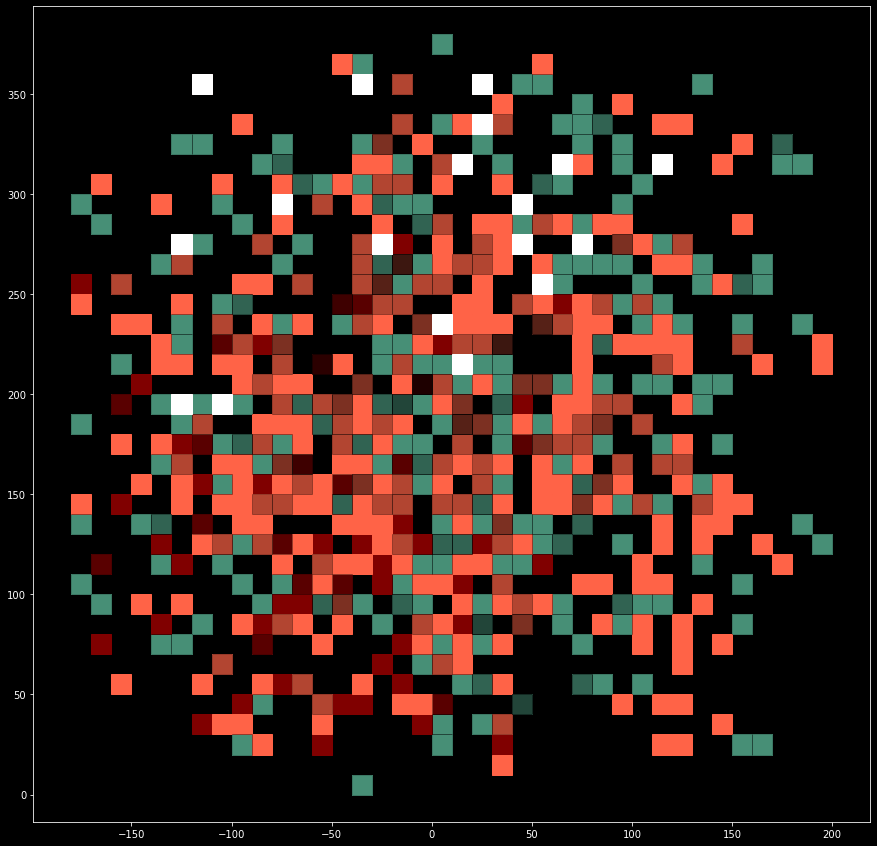

In [20]:
#figure size
plt.figure(figsize = (15,15))
plt.style.use('dark_background')

#set the limit of axis
plt.xlim(-50, 250)
plt.ylim(-50, 250)

#Attributes Objects blue
rectsb = []
rects_b = 20

#Attributes Objects maroon
rectsr = []
rects_o = 10

#Attributes Objects orange
rectsm = []

#Attributes overlay shadow
rectunion1 = []
rectunion2 = []
rectunion3 = []

#Attributes white shadow
rectshad = []




# Create blue Objects
for x in range(rects_b):
    for y in range(rects_b):
        
        r = Rect(x*10, y*10, (x+1)*10, (y+1)*10)
        rectsb.append(r)
    
        distance = random.randint(0, r.cy)
        distance2 = 10
        r.move(distance2*int(random.random()*10)*2, -distance2*int(random.random()*10)*2)
     
    
# Create maroon Objects
for x in range(rects_o):
    
    for y in range(rects_o):
            
        r = Rect(x*10, y*10, (x+1)*10, (y+1)*10)
        rectsm.append(r)
    
        distance = random.randint(0, r.cy)
        distance2 = 10
        r.move(distance2*int(random.random()*10)*2, -distance2*int(random.random()*10)*2)
    
    
# Create orange Objects
for x in range(rects_b):
    
    for y in range(rects_b):
            
        r = Rect(x*10, y*10, (x+1)*10, (y+1)*10)
        rectsr.append(r)
    
        distance = random.randint(0, r.cy)
        distance2 = 10
        r.move(distance2*int(random.random()*10)*2, -distance2*int(random.random()*10)*2)
        
    rectshad.append(r)

# Create union Objects   
for rb in rectsb:
    for rr in rectsr:
        if rb.cx == rr.cx and rb.cy == rr.cy:            
            rectunion1.append(rr)
            rectunion2.append(rb)

rectunion3 = [x for x in rectunion2 if x not in rectunion1]

'''
def filter_list(full_list, excludes):
    s = set(excludes)
    return (x for x in full_list if x not in s)

rectunion1 = list(filter_list(rectsr, rectsb))
'''


#COLOR
for rs in rectsb:
    rs.display('mediumaquamarine')                   
       
for rs in rectsm:
    rs.display('maroon')
    
for rs in rectsr:
    rs.display('tomato')
        
for rs in rectunion3:
    ct = [0, 0, 0, 0.3]
    rs.display(ct)
    
for rs in rectshad:
    ct = [1, 1, 1, 1]
    rs.display(ct)